<a href="https://colab.research.google.com/github/konradVEH/CHL5230/blob/main/datathon2wk3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Datathon Week #3**
<b> Team: </b> Gemma Postill, Rebecca Lee, Konrad Samsel <br>
<b> Student Numbers </b> , 1005902917, 1004041967<br>
<b> Team Number: </b> 4<br>
<b> Course: </b> CHL5239 Fall 2023<br>
<b> Date: </b> 2023-10-03 <br>
<br>

<h5> <b> Basic Features of Data Analysis Project:</b></h5>
<b> Dataset: </b> Mortality Dataset for Cardiovascular Disease Complications<br>
<b> Outcome of Interest: </b> Mortality Status (Binary)<br>
<b> Focal ML Model: </b> Logistic Regression

# Part 1: Import Data & Libraries

In [15]:
#mount drive - for Import Option 1
from google.colab import drive
drive.mount('/content/drive')

# Import libraries - Basic
from google.colab import files
import os
import numpy as np
import pandas as pd

#Import Libraries - Data Visualization
import plotly.express as px
import seaborn as sns
import scipy.stats as stats

#Import Libraries - Logistic Lecture
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings

#Import from Google Drive - Option 1 ===========================================

df = pd.read_csv("drive/My Drive/ML Course/ML Week 3/Mortality_Dataset.csv") #Konrad
#df = pd.read_csv("drive/My Drive/applied ML/ML Week 3/Mortality_Dataset.csv") #Rebecca
#-------------------------------------------------------------------------------

#Import from Local Drive - Option 2 ============================================

# # Define the desired file path (name)
# file_path = '/content/Mortality_Dataset.csv'

# # Check if the file exists in the specified path
# if not os.path.exists(file_path):
#     # File doesn't exist; upload it
#     uploaded = files.upload()

#     # Save the uploaded file to the specified path
#     for filename in uploaded.keys():
#         os.rename(filename, file_path)
# Load the data
# df = pd.read_csv(file_path)
#----------------------------------------------------------(ctrl+/ to uncomment)

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# Part 2: Descriptive Analysis and Pre-Processing

**2.1.Descriptive Statistics and Analysis**

We will begin by identifying any missing data in our dataset, to identify if there are variables that have a significant proportion of missing data and therefore cannot be used. We will also describe our data further by identifying the distribution of each predictor variable, identifying mean and standard deviation/IQR for continuous variables, and proportions of each level for categorical variables.


In [ ]:
### Descriptive Analysis PART 1 ==========================
### DATA TYPES, MISSING VALUES, BASIC DESCRIPTIVES

#Get shape of df
print(df.shape) # there are 299 ROWS and 13 COLUMNS

# Display the column names, data types of each columnm, and explore for NA values
print(df.info()) # No NA/Null
print(df.isna().sum()) #double-check for NA val using another function. No NAs.

#Do a descriptive analysis of all variables (numerical and categorical)
print(df.describe(include='all'))
#we also check the min for each variable, to see if missing values arent accidentally coded as "0" e.g., BMI = 0 which would be implausible

(299, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB
None
age

In [ ]:
### Descriptive Analysis PART 2 ================================================
### POPULATION DISTRIBUTION (Basic Features)

### POPULATION DISTRIBUTION

#I would like to check for MINORITY BIAS: Certain groups being underrepresented in the data


# Using groupby to calculate the average age by gender
avg_age_by_sex = df.groupby('sex')['age'].mean().reset_index()
# Create an interactive donut chart
fig_donut = px.pie(avg_age_by_sex, names='sex', values='age', title='Average Age by Gender', hole=0.5)
# Customizing the color and theme
fig_donut.update_traces(textinfo='percent+label', pull=[0, 0], marker=dict(colors=['#82153d', '#0d7b94']))
fig_donut.update_layout(template="plotly_white")
# Show the plot
fig_donut.show(renderer="colab")
#Are males and females represented in sufficient numbers? YES

#Distribution of Age by Gender -------------------------------------------------
# Are different ages, across gender, represented in the data?

fig_box = px.box(df, x='sex', y='age', title='Box Plot of Age Grouped by Gender',
                 color='sex', points="outliers", color_discrete_sequence=['#0d7b94', '#82153d'])
fig_box.update_layout(template="plotly_white")
fig_box.show()
#See that age is similar by gender, one biologically plausaible outlier, approximately normally distributed, will keep outlier.



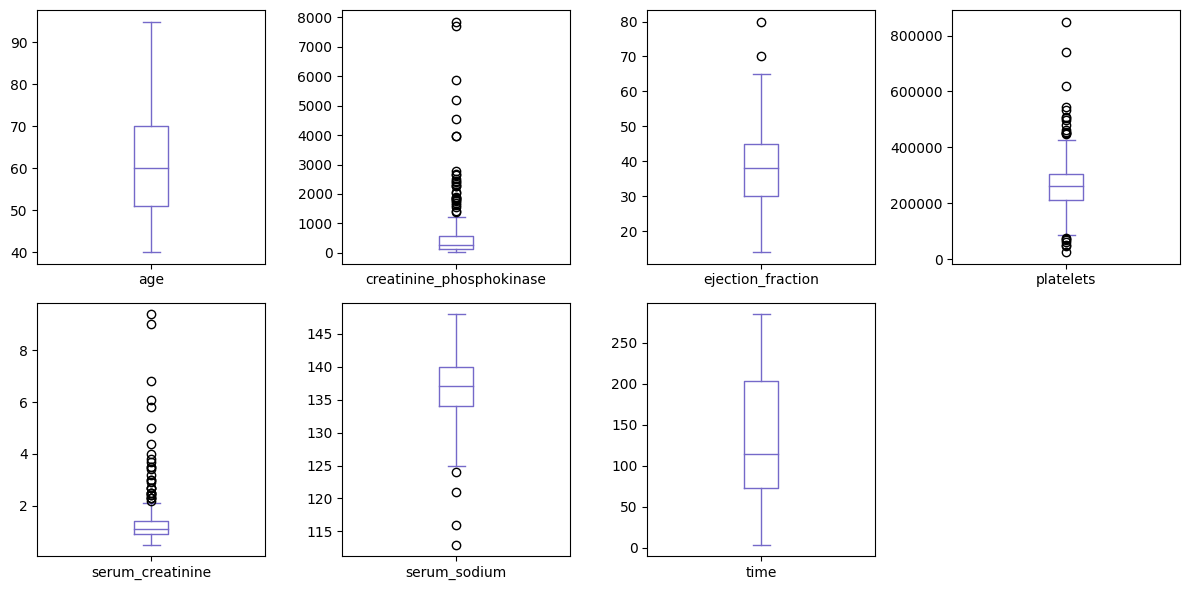

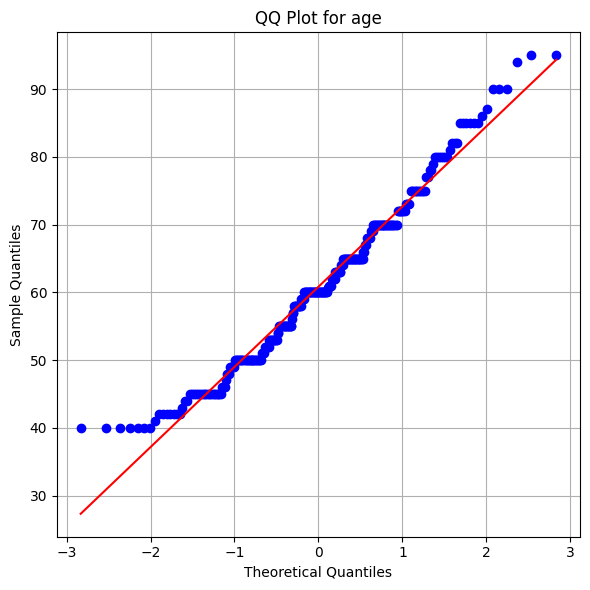

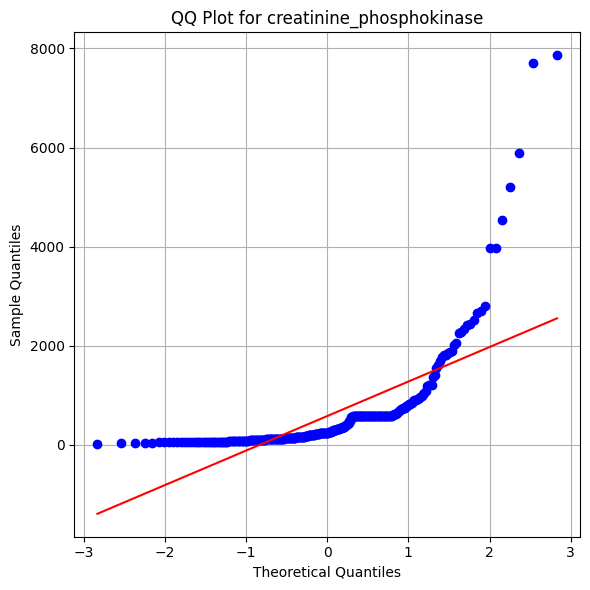

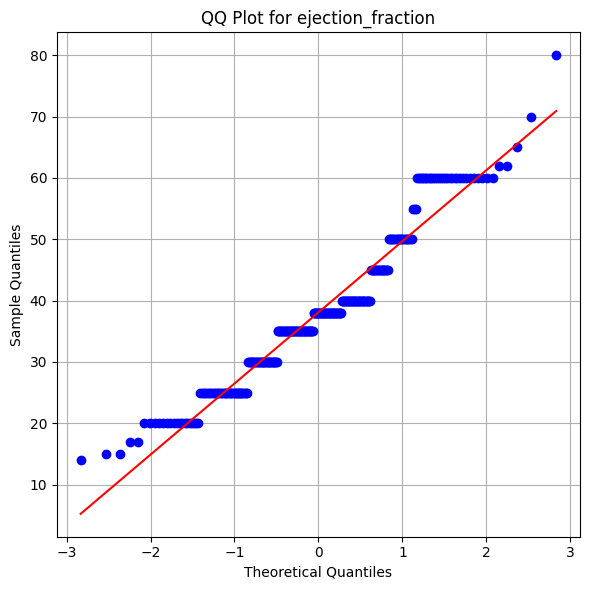

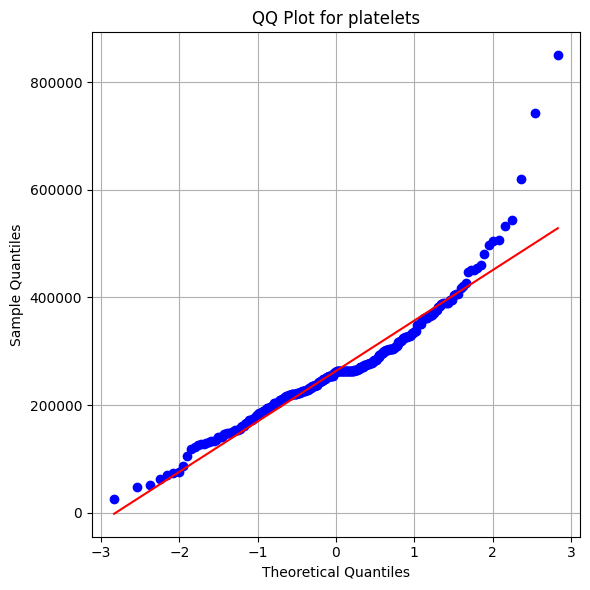

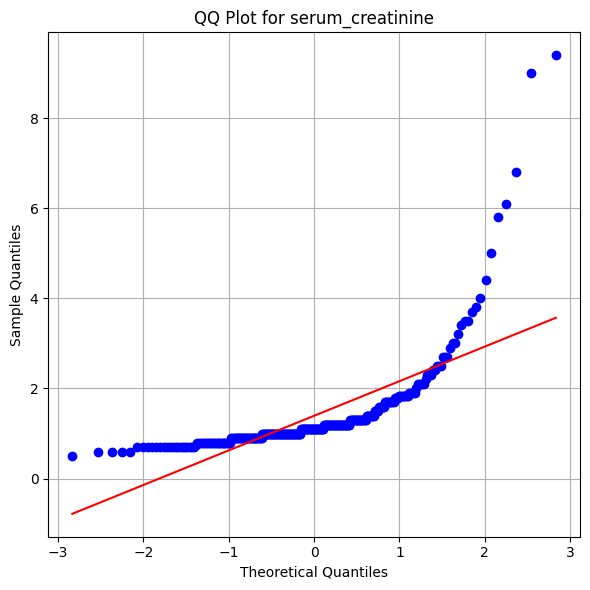

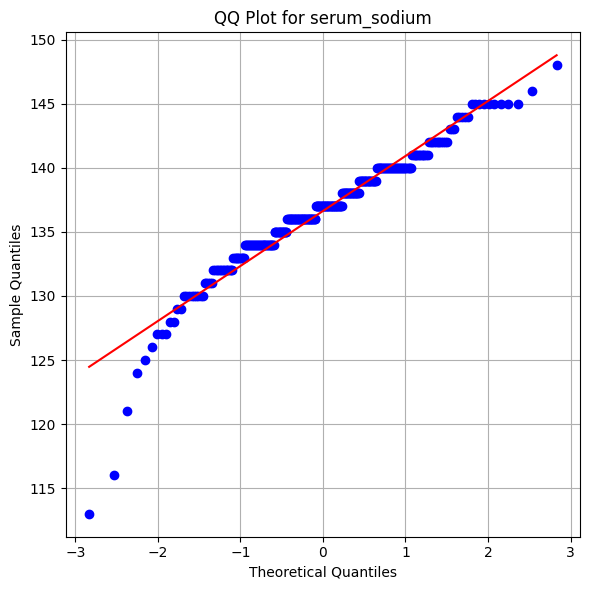

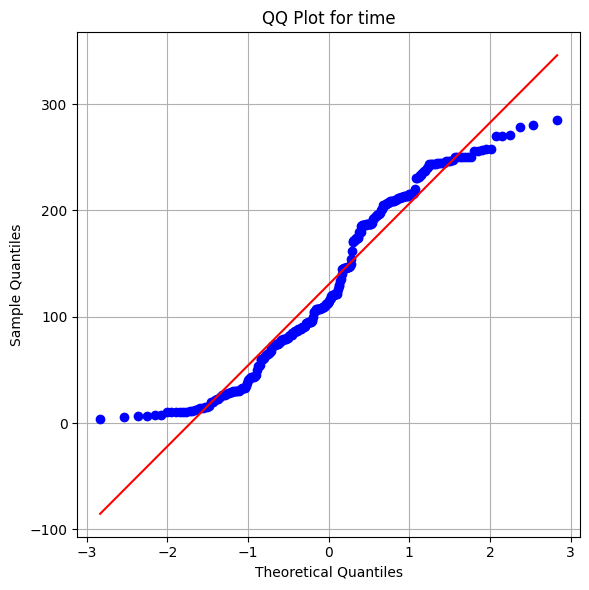

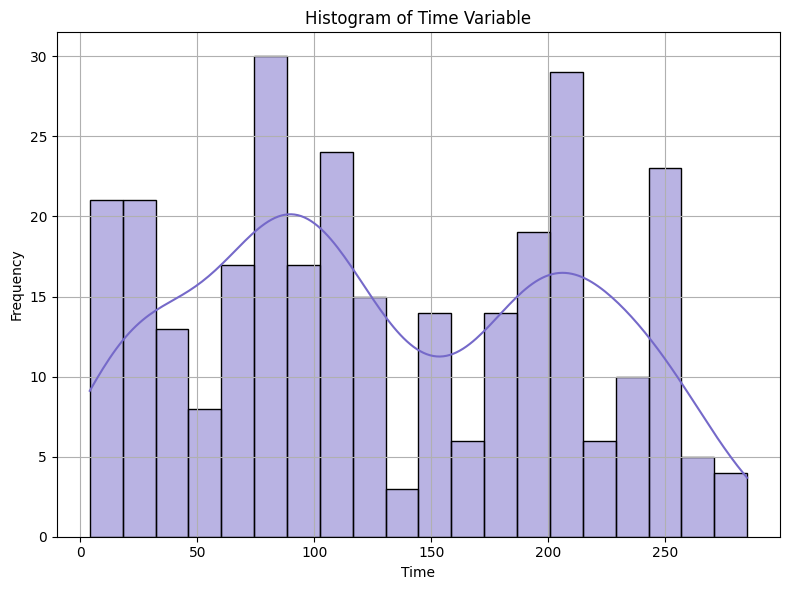

In [ ]:
### Descriptive Analysis PART 3 ================================================
### OUTLIERS AND DISTRIBUTION AMONG CONTINOUS VARIABLES (INCL NORMALITY - A CONDITION OF LOG REGRESSION)


continuous = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

#plot boxplots
df[continuous].plot(kind='box', subplots=True, layout=(2, 4), figsize=(12, 6), color='#7569c9')
plt.tight_layout()
plt.show()

##qq plots
for var in continuous:
    plt.figure(figsize=(6, 6))
    stats.probplot(df[var], dist="norm", plot=plt)
    plt.title(f'QQ Plot for {var}')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot a histogram for the 'time' variable
plt.figure(figsize=(8, 6))
sns.histplot(df['time'], bins=20, kde=True, color='#7569c9')
plt.title('Histogram of Time Variable')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

#Results of Descriptive Analysis for Continous Data & Re-expression
As the logistic regression model is a parametric model, it assumes that data are normally distributed. We examined for the presence of potential outliers, as well as for the normality of each continous variable using a QQ plot.

Results in indicate the following:

There appear to be potential outliers for the following variables: 'creatinine_phosphokinase', 'platelets', and 'serum_creatinine'

Looking at the qq plots, these same variables appear to be right skewed.

We will re-express these variables and re-examine their normality.

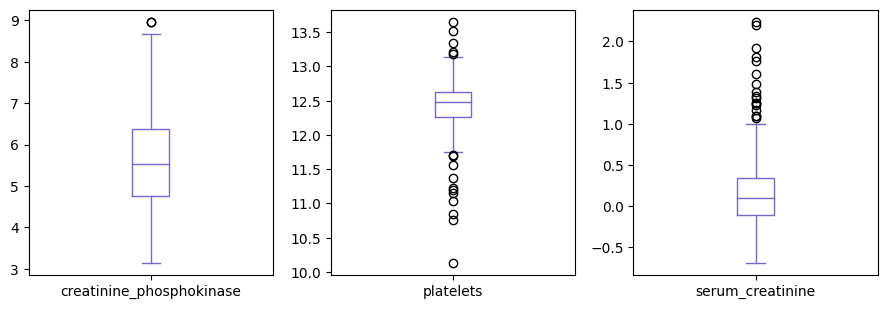

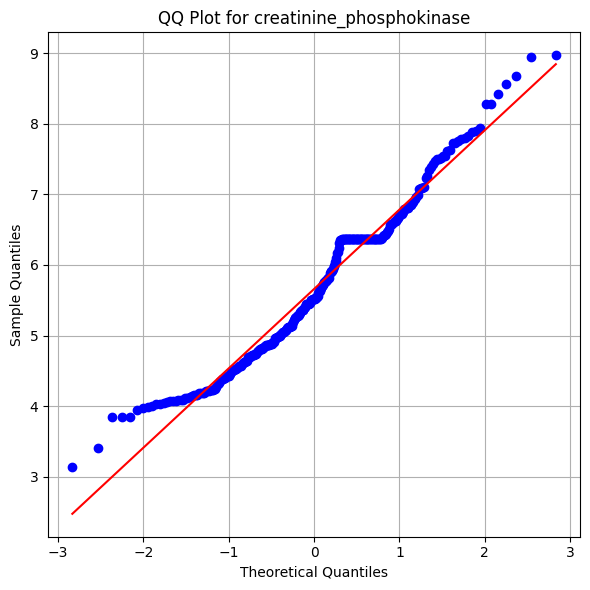

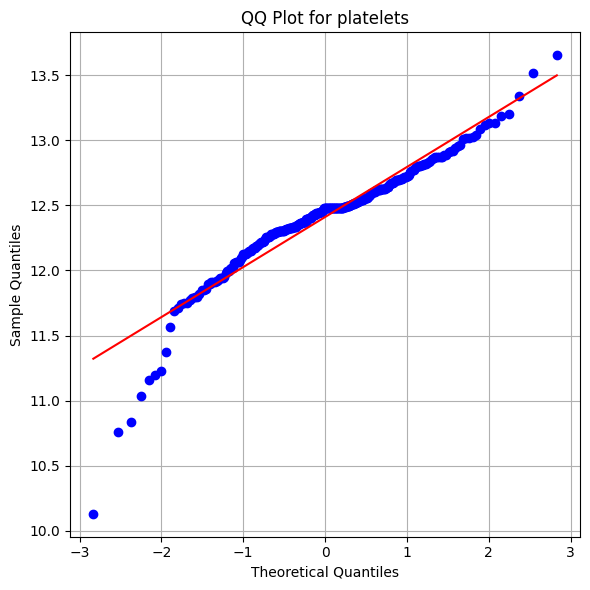

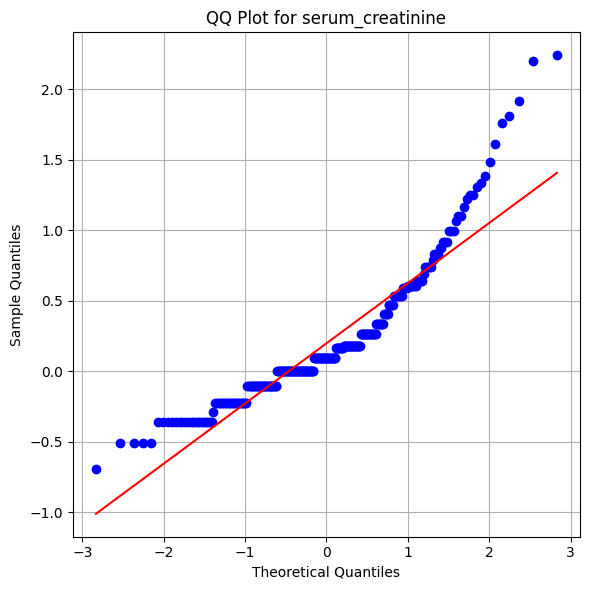

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                  6.366470         0                 20   
1  55.0        0                  8.969669         0                 38   
2  65.0        0                  4.983607         0                 20   
3  50.0        1                  4.709530         0                 20   
4  65.0        1                  5.075174         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  12.487485          0.641854           130    1   
1                    0  12.481270          0.095310           136    1   
2                    0  11.995352          0.262364           129    1   
3                    0  12.254863          0.641854           137    1   
4                    0  12.697715          0.993252           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

In [ ]:
#transform right skewed variables and reduce number of outliers

continuous_log = ['creatinine_phosphokinase', 'platelets', 'serum_creatinine']

df_norm = df

#Re-express data as log
for var in continuous_log:
    df_norm[var] = np.log(df_norm[var])

#plot boxplots
df_norm[continuous_log].plot(kind='box', subplots=True, layout=(2, 4), figsize=(12, 6), color='#7569c9')
plt.tight_layout()
plt.show()

##qq plots
for var in continuous_log:
    plt.figure(figsize=(6, 6))
    stats.probplot(df_norm[var], dist="norm", plot=plt)
    plt.title(f'QQ Plot for {var}')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
print(df_norm.head())
  #Comparing it to the untransormed data, these plots look better, less outliers and more closer to a normal distribution

In [ ]:
#I will apply the normalized values back into the main dataset
df = df_norm

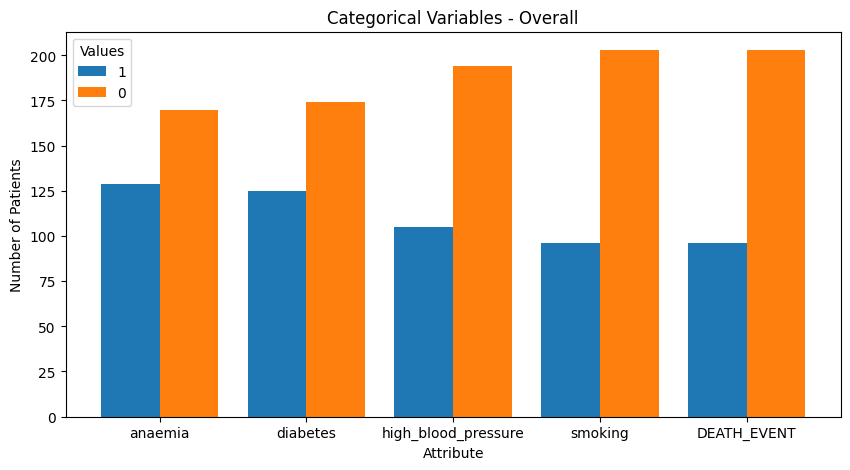

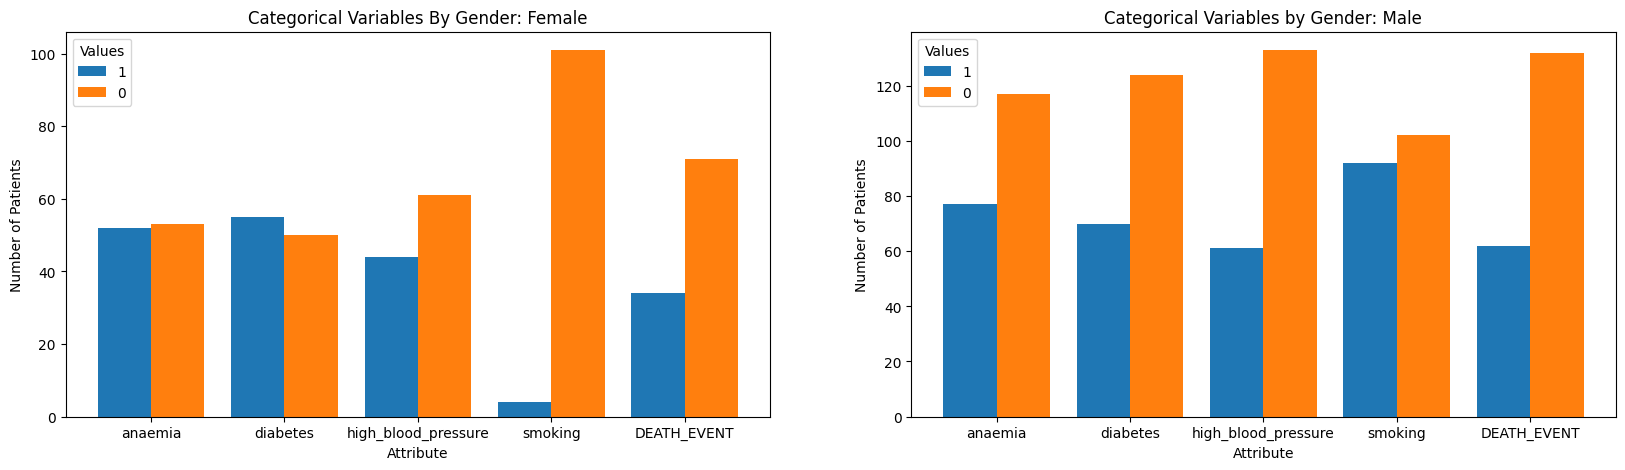

smoking    0   1
sex             
0        101   4
1        102  92


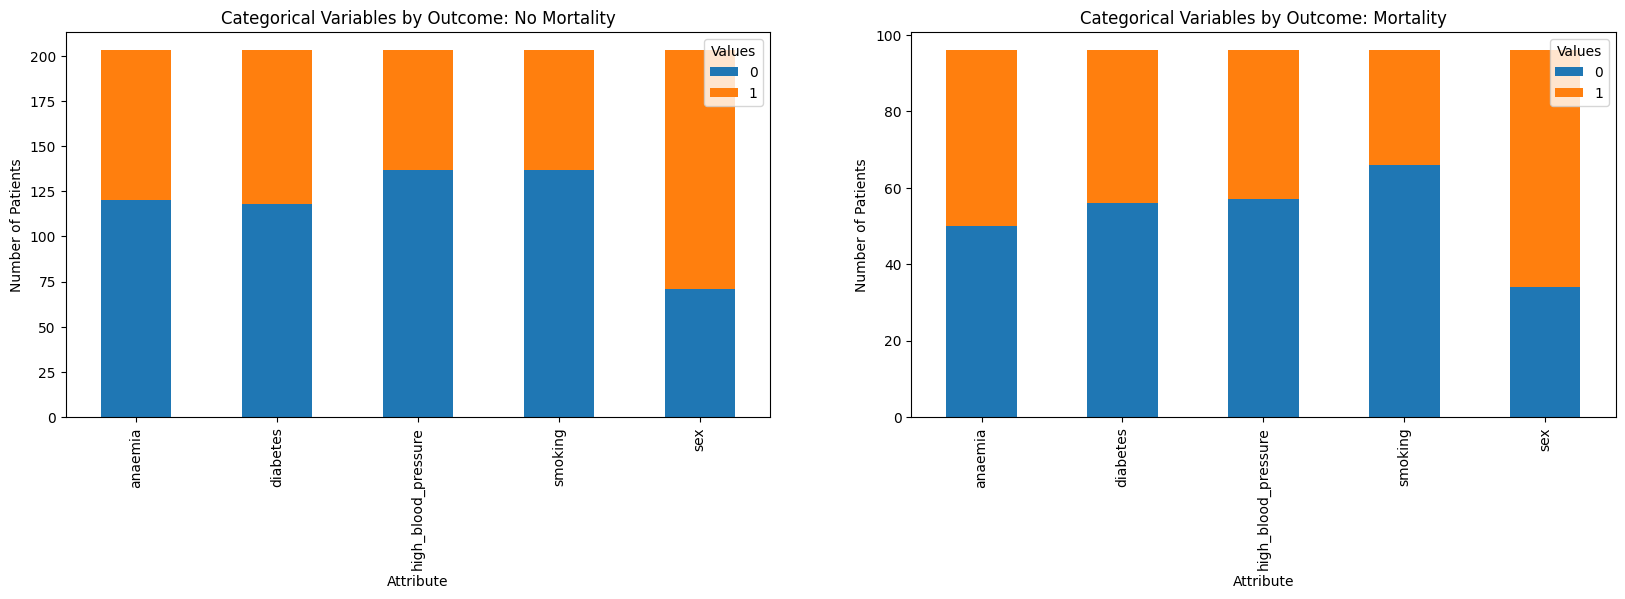

In [17]:
### Descriptive Analysis PART 4 ================================================
### FREQUENCY AMONG CATEGORICAL VARIABLES

# overall - both sexes
categorical = ["anaemia", "diabetes", "high_blood_pressure", "smoking", "DEATH_EVENT"]

yes, no = np.zeros(len(categorical)), np.zeros(len(categorical))

for c in categorical:
   yes[categorical.index(c)] = np.sum(df[c]==1)
   no[categorical.index(c)] = np.sum(df[c]==0)

fig = plt.figure(figsize=[10, 5])
x = np.arange(len(categorical))
plt.bar(x-0.2, yes, 0.4, label="1")
plt.bar(x+0.2, no, 0.4, label="0")
plt.xticks(ticks=x, labels=categorical)
plt.title("Categorical Variables - Overall")
plt.xlabel("Attribute")
plt.ylabel("Number of Patients")
plt.legend(title="Values")
plt.show()

#---------------

# comorbid conditions by gender (0 = female; 1 = male)

cat_f = df.loc[df["sex"]==0]
cat_m = df.loc[df["sex"]==1]

yes_f, no_f = np.zeros(len(categorical)), np.zeros(len(categorical))
yes_m, no_m = np.zeros(len(categorical)), np.zeros(len(categorical))

for c in categorical:
   yes_f[categorical.index(c)] = np.sum(cat_f[c]==1)
   no_f[categorical.index(c)] = np.sum(cat_f[c]==0)
   yes_m[categorical.index(c)] = np.sum(cat_m[c]==1)
   no_m[categorical.index(c)] = np.sum(cat_m[c]==0)

x = np.arange(len(categorical))

fig, (ax1, ax2) = plt.subplots(1,2, figsize=[20,5])

ax1.bar(x-0.2, yes_f, 0.4, label="1")
ax1.bar(x+0.2, no_f, 0.4, label="0")
ax1.set_xticks(ticks=x, labels=categorical)
ax1.set_title("Categorical Variables By Gender: Female")
ax1.set_xlabel("Attribute")
ax1.set_ylabel("Number of Patients")
ax1.legend(loc="upper left", title="Values")

ax2.bar(x-0.2, yes_m, 0.4, label="1")
ax2.bar(x+0.2, no_m, 0.4, label="0")
ax2.set_xticks(ticks=x, labels=categorical)
ax2.set_title("Categorical Variables by Gender: Male")
ax2.set_xlabel("Attribute")
ax2.set_ylabel("Number of Patients")
ax2.legend(title="Values")

plt.show()


# comorbid conditions by outcome (0 = no mortality event; 1 = mortality event)

categorical = ["anaemia", "diabetes", "high_blood_pressure", "smoking", "sex"]
cat_no_mortality = df.loc[df["DEATH_EVENT"] == 0]
cat_mortality = df.loc[df["DEATH_EVENT"] == 1]

counts_no_mortality = np.zeros(len(categorical))
counts_mortality = np.zeros(len(categorical))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[20, 5])
cat_no_mortality_counts = cat_no_mortality[categorical].apply(pd.value_counts).T
cat_no_mortality_counts.plot(kind='bar', stacked=True, ax=ax1)
ax1.set_title("Categorical Variables by Outcome: No Mortality")
ax1.set_xlabel("Attribute")
ax1.set_ylabel("Number of Patients")
ax1.legend(title="Values")

cat_mortality_counts = cat_mortality[categorical].apply(pd.value_counts).T
cat_mortality_counts.plot(kind='bar', stacked=True, ax=ax2)
ax2.set_title("Categorical Variables by Outcome: Mortality")
ax2.set_xlabel("Attribute")
ax2.set_ylabel("Number of Patients")
ax2.legend(title="Values")

print(pd.crosstab(df['sex'], df['smoking']))

plt.show()
#there are at least 5-10 observations for each category when performing a cross-tabulation by the outcome
#as such, fisher seems to be appropriate.

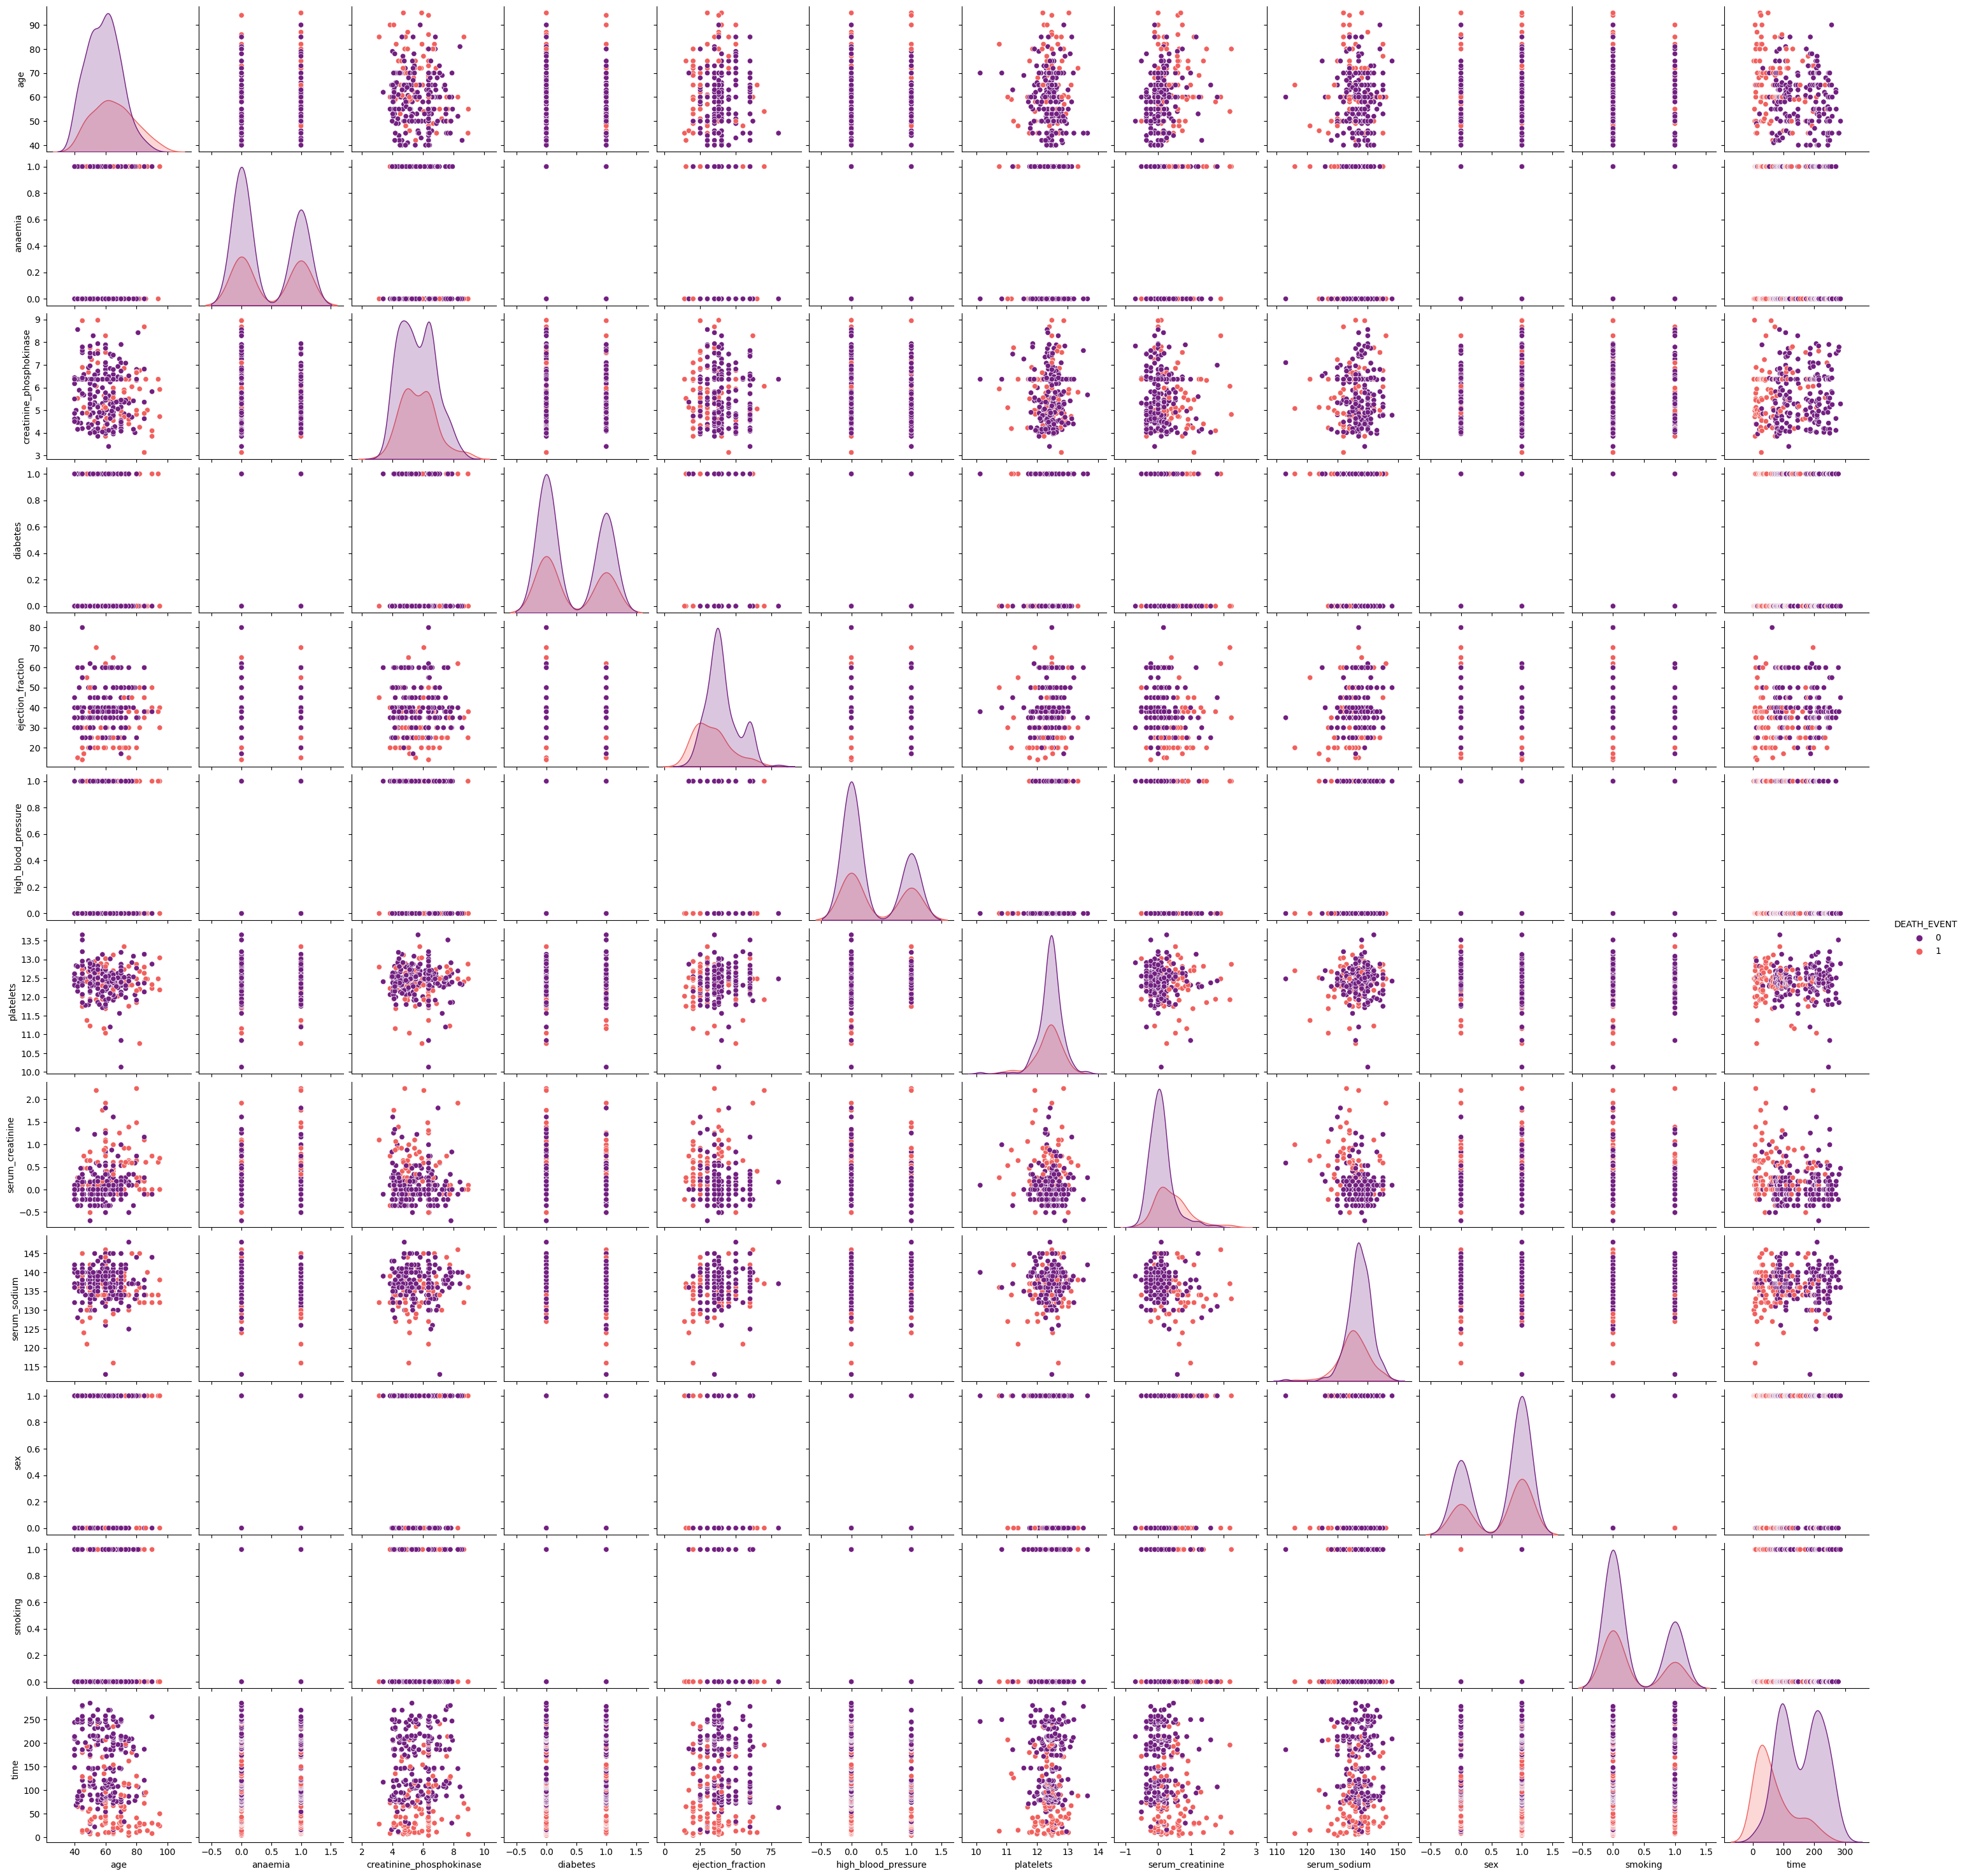

In [ ]:
# Descriptive Statistics Part 5: Pairwise Plot

import seaborn as sns
sns.pairplot(df, hue='DEATH_EVENT', palette="magma")
plt.show()

#Part 3: Feature Selection

We will first remove the follow-up duration feature as we believe that the nature of the follow-up duration feature would affect the performance of our model.

We will then create a correlation matrix to observe collinearity between features within the data. We will select which features to include in our regression analysis based on the findings of this analysis.

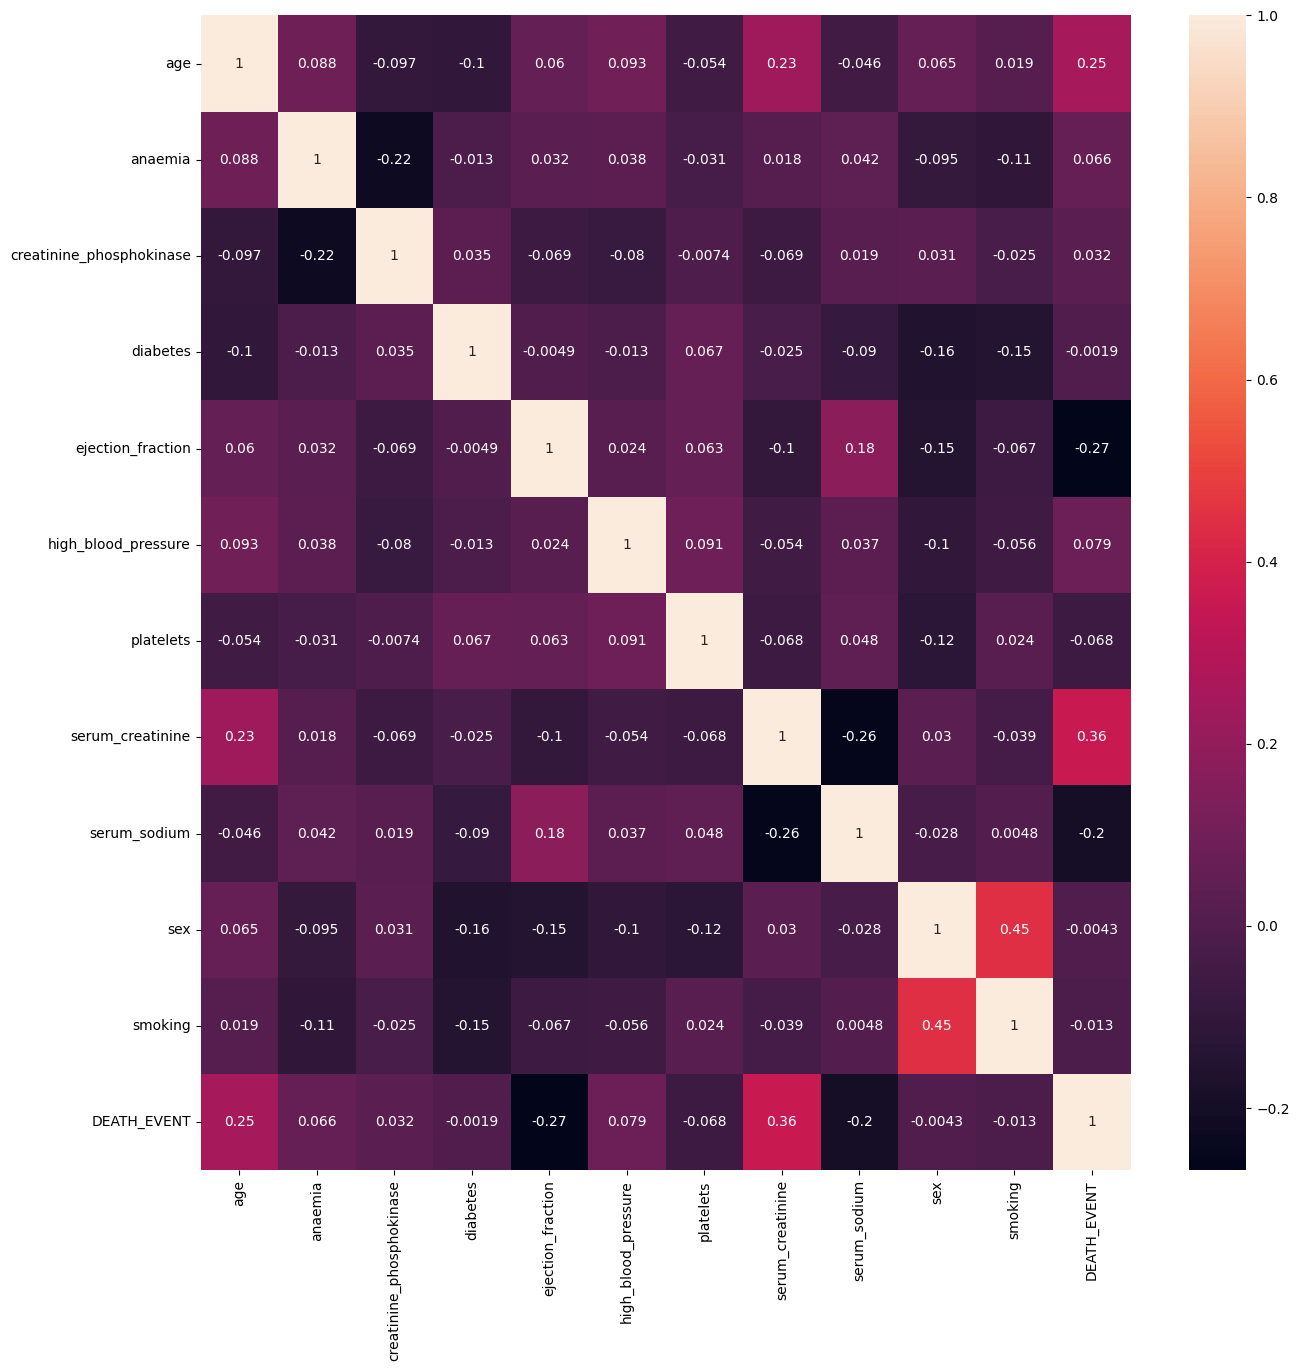

In [ ]:
data = df[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'DEATH_EVENT']]

fig = plt.figure(figsize=[15,15])
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

Based on the correlation matrix shown above, the following features have the strongest correlation:
- sex and smoking
- serum_creatinine and DEATH_EVENT
- ejection_fraction and DEATH_EVENT

#Part 4: Model Development

We will split the data into features and our target variable, death_event. We will then split the data into testing and training sets. We will then normalize the data, then train and test the logistic regression model.

In [ ]:
#Model the data and select the value of lambda that maximizes discrimination
from sklearn.model_selection import cross_val_score

# Split the data into features and target variable: DEATH_EVENT
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

# ==========================================================

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Normalizing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#choose best regulariazation parameter (lamba), I'll use a grid search method since I dont think gradient descent would be appropriate
alphas = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]
mean_mse_scores = []

for alpha in alphas:
  log_reg = LogisticRegression(penalty='l2', C=alpha, solver='liblinear')
  mse_scores = -cross_val_score(log_reg, X_train, y_train, cv=6, scoring='neg_mean_squared_error')
  mean_mse = np.mean(mse_scores)
  mean_mse_scores.append((alpha, mean_mse))

print(mean_mse_scores)
print('The min mean MSE (determined through 6fold CV on training data) is...')
print(min(mean_mse_scores, key=lambda x: x[1]))

[(0.001, 0.272008547008547), (0.005, 0.25523504273504277), (0.01, 0.25523504273504277), (0.05, 0.2635683760683761), (0.1, 0.27617521367521364), (0.5, 0.259508547008547), (1, 0.25961538461538464), (5, 0.2639957264957265), (10, 0.2639957264957265), (50, 0.2639957264957265), (100, 0.2639957264957265), (500, 0.25982905982905985), (1000, 0.2639957264957265)]
The min mean MSE (determined through 6fold CV on training data) is...
(0.005, 0.25523504273504277)


In [ ]:
# Split the data into features and target variable: DEATH_EVENT
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

# ==========================================================

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Normalizing data
print(X.head())
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Training logistic regression model
#we used the ridge regression method
log_reg = LogisticRegression(penalty='l2', C=0.05, solver='liblinear')
log_reg.fit(X_train, y_train)

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                  6.366470         0                 20   
1  55.0        0                  8.969669         0                 38   
2  65.0        0                  4.983607         0                 20   
3  50.0        1                  4.709530         0                 20   
4  65.0        1                  5.075174         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  12.487485          0.641854           130    1   
1                    0  12.481270          0.095310           136    1   
2                    0  11.995352          0.262364           129    1   
3                    0  12.254863          0.641854           137    1   
4                    0  12.697715          0.993252           116    0   

   smoking  
0        0  
1        0  
2        1  
3        0  
4        0  


LogisticRegression(C=0.05, solver='liblinear')

# Part 5: Predictive Ability

After testing, and training our mode, we will use our model to make predictions on the testing data. We will evaluate the predictive ability of our model by creating a confusion matrix, and assessing the precision, recall, and f1 scores of our model. We will then plot the result of our logistic regression to visualize the result of our logistic regression analysis.

Confusion Matrix:
[[38  2]
 [11  9]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.95      0.85        40
           1       0.82      0.45      0.58        20

    accuracy                           0.78        60
   macro avg       0.80      0.70      0.72        60
weighted avg       0.79      0.78      0.76        60



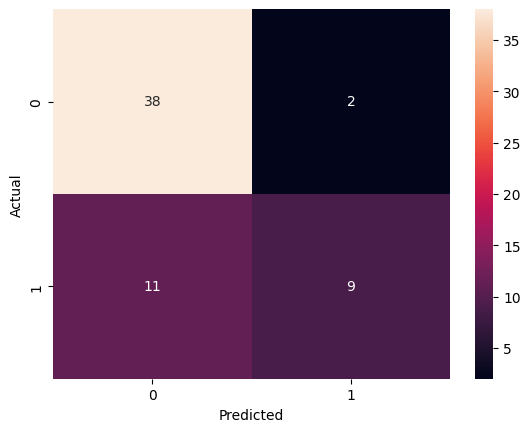

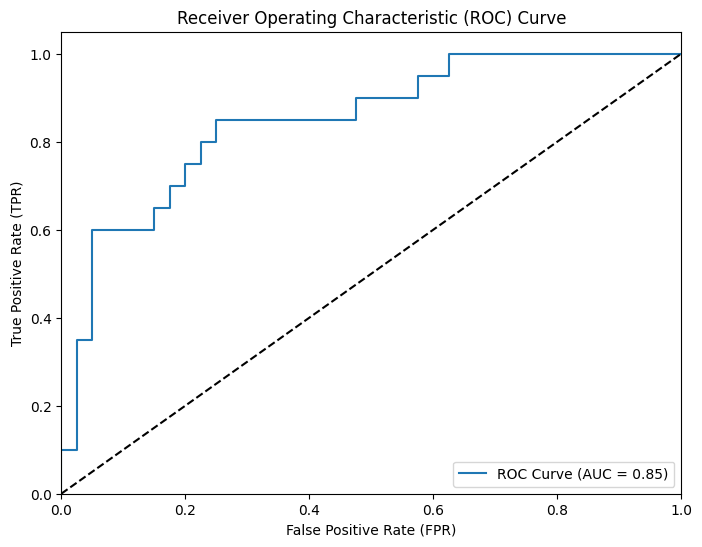

In [ ]:
# Part 1: Predictive Ability
from sklearn.metrics import roc_curve, roc_auc_score

# Use the model to make predictions on the testing data
y_pred = log_reg.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


#visualizing ROC at different probability thresholds:
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]  # probability of 1 (outcome)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Plot diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

/usr

IndexError: ignored

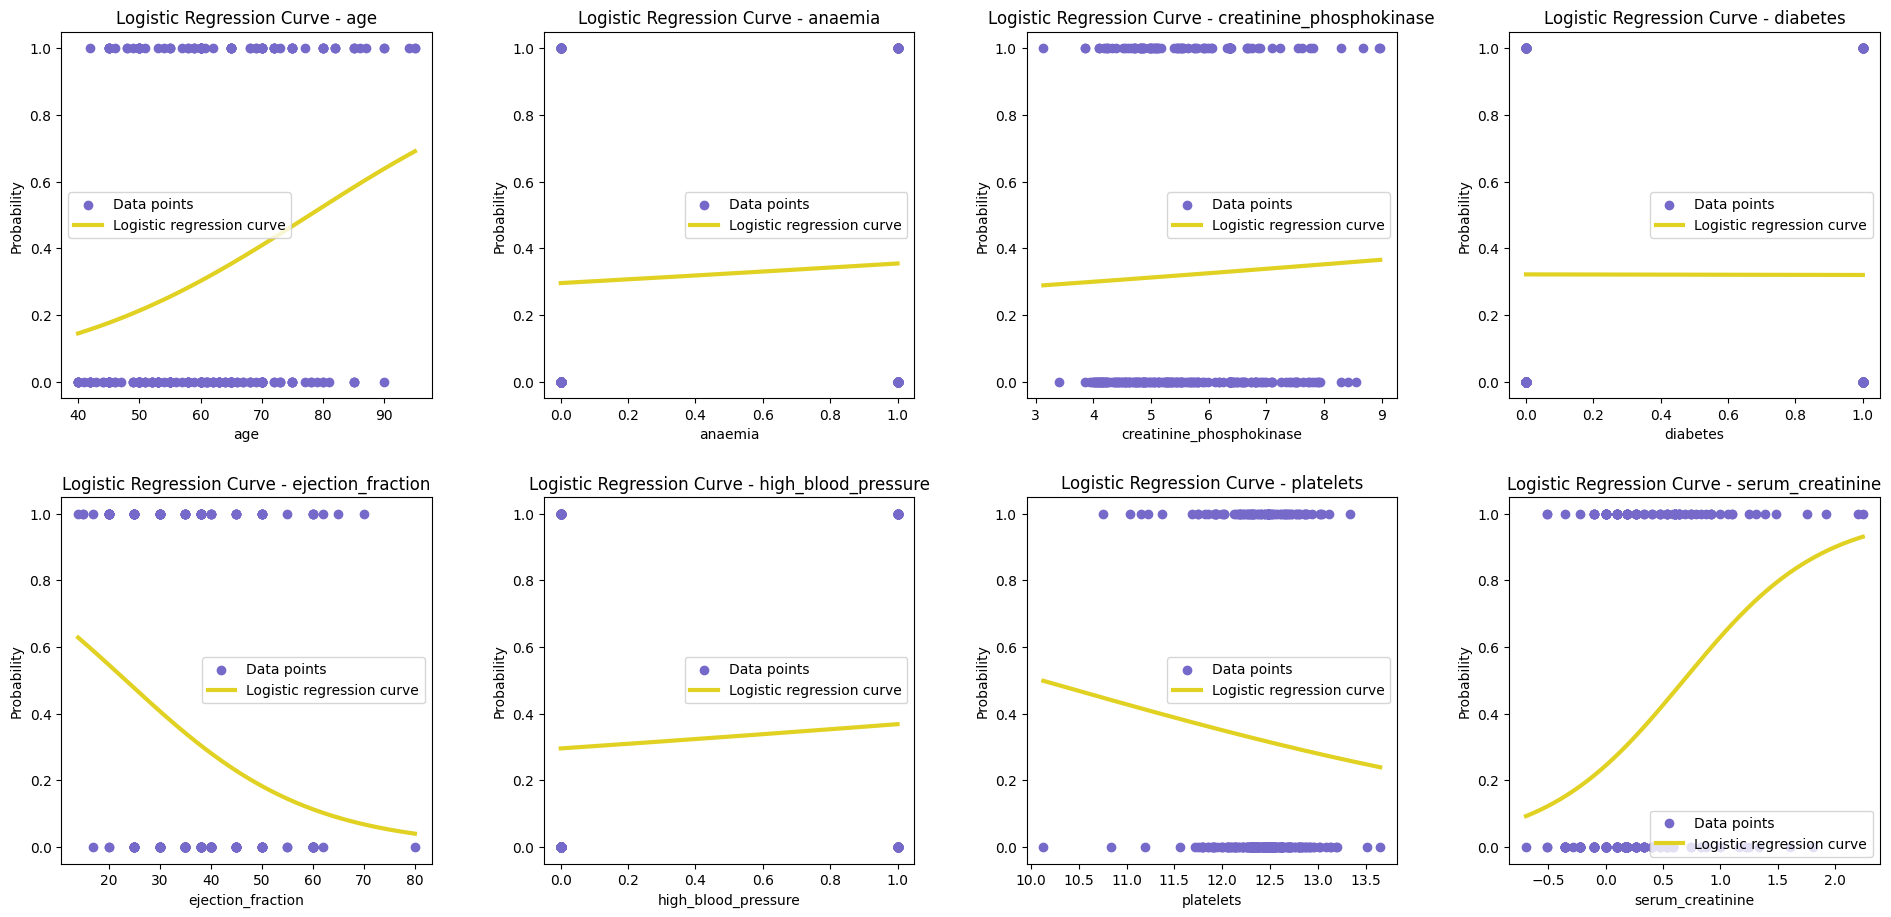

In [ ]:
# Part 2: Visualizing Logistic Regression

# Create logistic regression object
log_reg = LogisticRegression()

fig, axs = plt.subplots(2, 4, figsize=(20, 10))
fig.tight_layout(pad=5.0)  # Adds padding between subplots

for i, feature in enumerate(df.columns[:-1]):  # Exclude 'DEATH_EVENT' column
    row = i // 4  # Determine row index
    col = i % 4   # Determine column index

    # Reshape the feature and outcome arrays to fit the model
    X = df[[feature]]
    y = df['DEATH_EVENT']

    # Fit logistic regression model
    log_reg.fit(X, y)

    # Get min and max values of the feature for plotting
    x_test = np.linspace(X.min(), X.max(), 300)

    # Get the probability for each value in the range
    prob = log_reg.predict_proba(x_test)[:, 1]

    # Plot the data points
    axs[row, col].scatter(X, y, color='#7569c9', label='Data points')

    # Plot the sigmoid curve
    axs[row, col].plot(x_test, prob, color='#e0d122', lw=3, label='Logistic regression curve' )

    axs[row, col].set_title(f'Logistic Regression Curve - {feature}')
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel('Probability')
    axs[row, col].legend()

plt.show()

# Part 6: Validation

We will generate a logisitc regression model summary to assess the performance of our logistic regression model in predicting the DEATH_EVENT outcome.

In [ ]:
import statsmodels.api as sm
import pandas as pd

# Separate features and target variable
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Create and fit logistic regression model
log_reg = sm.Logit(y, X).fit()

# Get summary report
summary = log_reg.summary()
print(summary)

Optimization terminated successfully.
         Current function value: 0.357219
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                          Logit   Df Residuals:                      286
Method:                           MLE   Df Model:                           12
Date:                Sun, 01 Oct 2023   Pseudo R-squ.:                  0.4309
Time:                        23:40:03   Log-Likelihood:                -106.81
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                 2.330e-28
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       14.5033      8.057      1.800      0.072      -1.288